In [1]:
#set up libraries and packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.io import ascii
from scipy.stats import norm
import pandas as pd
import scipy.stats as stats
import random
import pylab
from scipy.stats import binom
from scipy.stats import beta
import matplotlib.pyplot as plt
import os

In [2]:
#read in the data file
#call data to show table
data = pd.read_csv("simple_RheaData.csv")
data = data.drop(columns = ['Sadness', 'BigSad', 'Pain', 'What even'])
#Diameter and depth are those aspects of crater. d/D is depth/diameter. CWS is Crater Wall Slope

       Min  1st Quart    Median    Mean  3rd Quart        Max
0  4.29279   7.639864  9.019208  9.3413  10.587942  18.085382


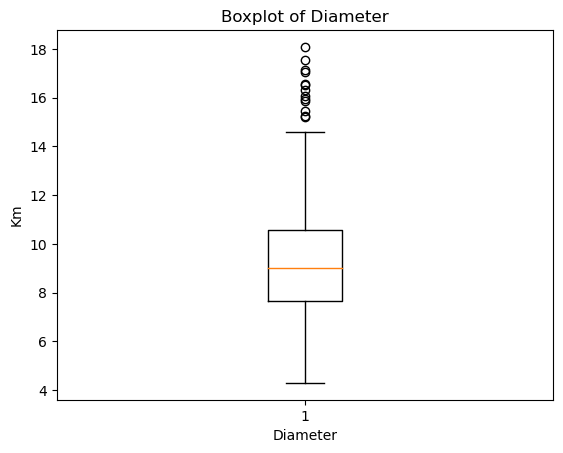

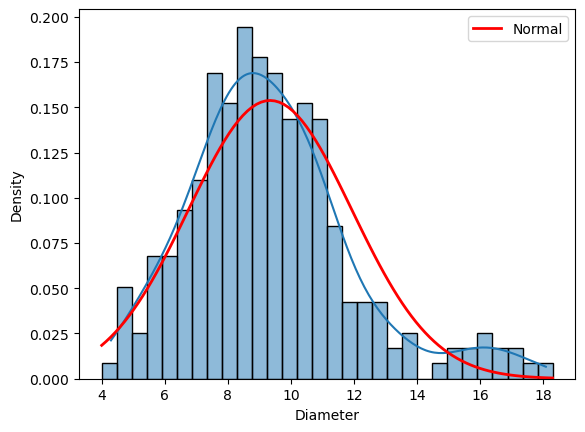

In [3]:
stats_dict = {"Min":np.min(data.Diameter),"1st Quart":np.quantile(data.Diameter,0.25),"Median":np.median(data.Diameter),"Mean":np.mean(data.Diameter),"3rd Quart":np.quantile(data.Diameter,0.75),"Max":np.max(data.Diameter)}
data_table = pd.DataFrame(data=stats_dict, index=[0])
print(data_table)

#boxplot of diameter
plt.boxplot(data.Diameter)
plt.title("Boxplot of Diameter")
plt.xlabel("Diameter")
plt.ylabel("Km")
plt.show()

#Histogram with kde (blue) and normal distribution (red)
ax = sns.histplot(data.Diameter,bins=30,binrange=[4,18.3],kde=True,stat="density")
x_pdf = np.linspace(4, 18.3, 100)
y_pdf = stats.norm.pdf(x_pdf,stats_dict["Mean"],np.sqrt(np.var(data.Diameter)))
ax.plot(x_pdf, y_pdf, 'r', lw=2, label='Normal')
ax.legend()
plt.show(ax)

In [5]:
#Likelihood (distributed only with theta as mean and v as variance)
xbar = stats_dict["Mean"]
v = 0.25*xbar
print("Variance: "+str(v))
n = 248
print("Number of Observations: "+str(n))

Variance: 2.335324990923387
Number of Observations: 248


In [6]:
#Posterior
mu_p = 1./(n/v+1/b)*(n*xbar/v)
var_p = 1./(n/v+1/b)

print('Posterior Mean = ',mu_p)
print('Posterior Variance =',var_p)

Posterior Mean =  9.312070513441826
Posterior Variance = 0.009387167856292162


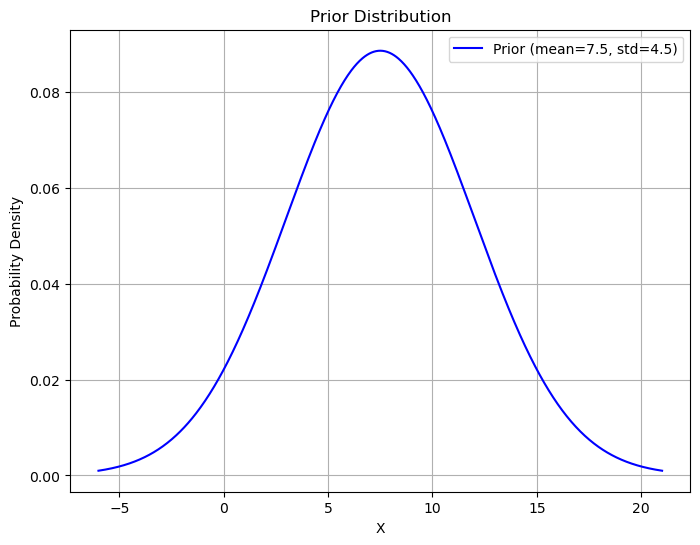

In [83]:
# Plot the prior
a = 7.5  # Mean of the prior
b = 4.5  # Standard deviation of the prior

# Generate the data to plot
x = np.linspace(a - 3 * b, a + 3 * b, 1000)

# Calc PDF
pdf = norm.pdf(x, loc=a, scale=b)

plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=f'Prior (mean={a}, std={b})', color='blue')
plt.title('Prior Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

a =  7.5 ; b =  4.5
count    248.000000
mean       7.724385
std        5.320509
min       -6.604763
25%        4.418664
50%        6.918382
75%       11.028742
max       22.330688
dtype: float64

a =  1.0 ; b =  1.0
count    248.000000
mean       1.005073
std        1.103218
min       -2.077178
25%        0.246928
50%        0.980258
75%        1.650938
max        4.810744
dtype: float64

a =  5.0 ; b =  8.0
count    248.000000
mean       5.435430
std        7.919230
min      -21.613741
25%        0.070800
50%        5.316048
75%       10.298886
max       28.447629
dtype: float64

a =  12.0 ; b =  1.0
count    248.000000
mean      11.842256
std        3.198732
min        3.446468
25%        9.769682
50%       11.843381
75%       13.861132
max       20.442181
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

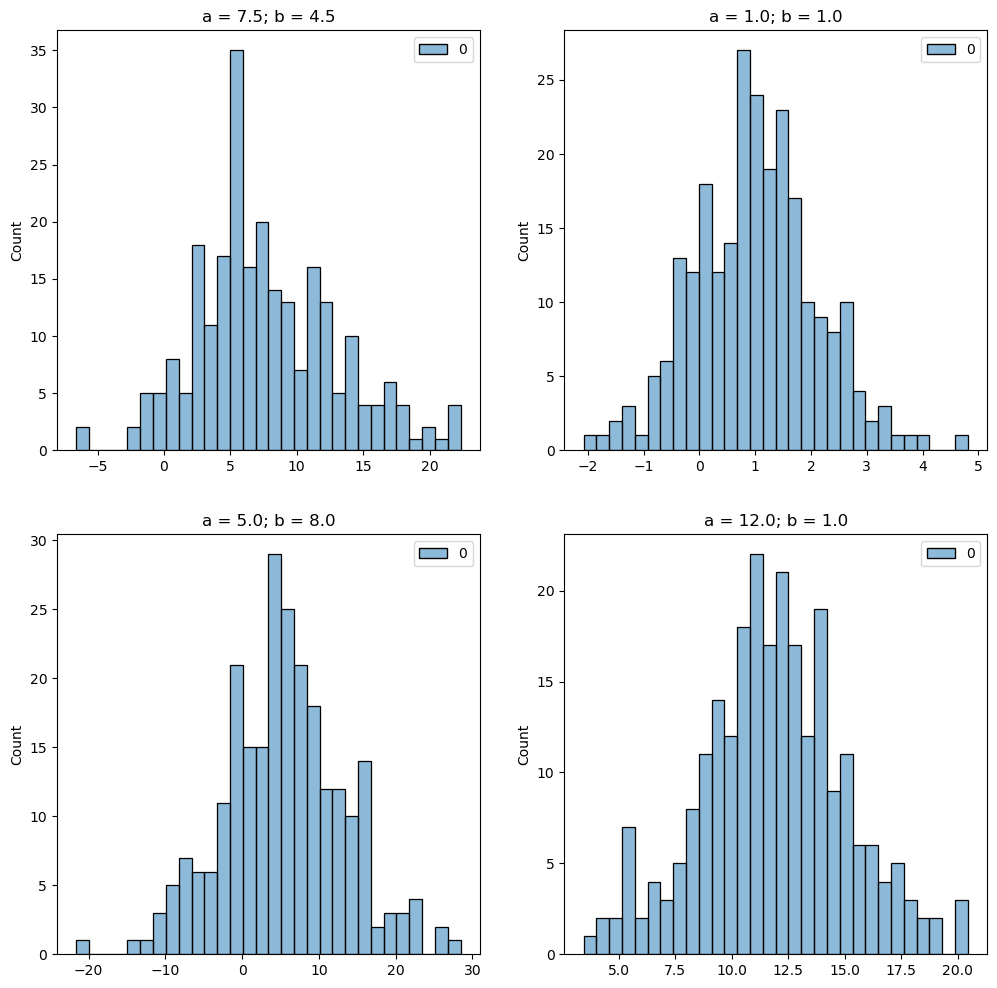

In [84]:
#Prior Predictive Check
    # Prior predictive check is to do what I just did above but with different a and b values 
    #to see if the shape matches the data any better
m = 248 #number of sims
a = 7.5  # Mean of the prior
b = 4.5  # Standard deviation of the prior

priorpred_dat1 = np.zeros((m,1))
# Calc PDF
for i in range(m):
    theta = norm.rvs(a,b)
    priorpred_dat1[i,0] = norm.rvs(theta,abs(0.25*theta))

plt1_title = str("a = "+str(a)+"; b = "+str(b))
print("a = ",a,"; b = ",b) 
print(pd.Series(priorpred_dat1[:,0]).describe())
#----------
a = 1.0  # Mean of the prior
b = 1.0  # Standard deviation of the prior

priorpred_dat2 = np.zeros((m,1))
# Calc PDF
for i in range(m):
    theta = norm.rvs(a,b)
    priorpred_dat2[i,0] = norm.rvs(theta,abs(0.25*theta))

plt2_title = str("a = "+str(a)+"; b = "+str(b))    
print("\na = ",a,"; b = ",b)     
print(pd.Series(priorpred_dat2[:,0]).describe())
#----------
a = 5.0  # Mean of the prior
b = 8.0  # Standard deviation of the prior

priorpred_dat3 = np.zeros((m,1))
# Calc PDF
for i in range(m):
    theta = norm.rvs(a,b)
    priorpred_dat3[i,0] = norm.rvs(theta,abs(0.25*theta))

plt3_title = str("a = "+str(a)+"; b = "+str(b))
print("\na = ",a,"; b = ",b)     
print(pd.Series(priorpred_dat3[:,0]).describe())
#----------
a = 12.0  # Mean of the prior
b = 1.0  # Standard deviation of the prior

priorpred_dat4 = np.zeros((m,1))
# Calc PDF
for i in range(m):
    theta = norm.rvs(a,b)
    priorpred_dat4[i,0] = norm.rvs(theta,abs(0.25*theta))

plt4_title = str("a = "+str(a)+"; b = "+str(b))
print("\na = ",a,"; b = ",b) 
print(pd.Series(priorpred_dat4[:,0]).describe())
#----------
fig,ax = plt.subplots(figsize = (12,12),ncols = 2,nrows = 2)
sns.histplot(data=priorpred_dat1, kde=False,ax = ax[0,0],bins=30)
sns.histplot(data=priorpred_dat2,kde=False,ax = ax[0,1], bins=30)
sns.histplot(data=priorpred_dat3,kde=False,ax = ax[1,0], bins=30)
sns.histplot(data=priorpred_dat4,kde=False,ax = ax[1,1], bins=30)
ax[0,0].set_title(plt1_title)
ax[0,1].set_title(plt2_title)
ax[1,0].set_title(plt3_title)
ax[1,1].set_title(plt4_title)

plt.show

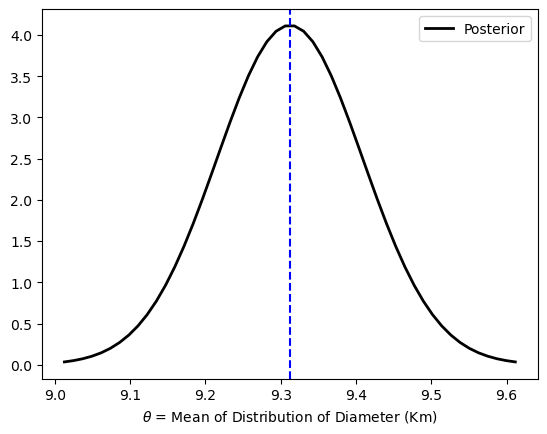

In [8]:
# Plot the posterior and run the posterior predictive check
xx = np.linspace(norm.ppf(0.001,loc=mu_p,scale=np.sqrt(var_p)),norm.ppf(0.999,loc=mu_p,scale=np.sqrt(var_p)))
plt.plot(xx, norm.pdf(xx,loc=mu_p,scale=np.sqrt(var_p)), 'k-', lw=2, label='Posterior')
plt.xlabel(r"$\theta}$ = Mean of Distribution of Diameter (Km)")
plt.legend()
plt.axvline(mu_p, color = "b", ls = "--")

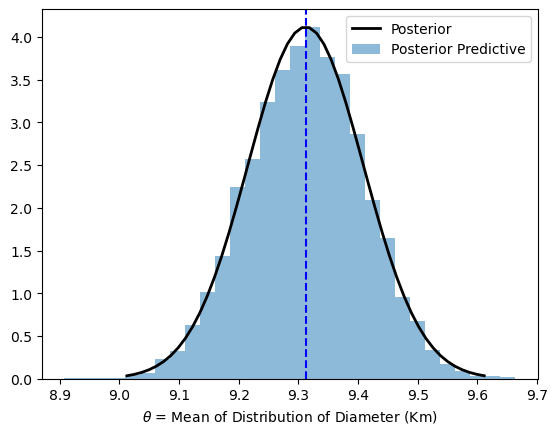

Mean of Posterior Predictive Check: 9.312449620591924


In [9]:
# Posterior predictive check
# Simulate data points from the posterior distribution
posterior_samples = np.random.normal(loc=mu_p, scale=np.sqrt(var_p), size=10000)

# Plot the posterior
xx = np.linspace(norm.ppf(0.001, loc=mu_p, scale=np.sqrt(var_p)), norm.ppf(0.999, loc=mu_p, scale=np.sqrt(var_p)))
plt.plot(xx, norm.pdf(xx, loc=mu_p, scale=np.sqrt(var_p)), 'k-', lw=2, label='Posterior')

# Plot the posterior predictive check
plt.hist(posterior_samples, bins=30, density=True, alpha=0.5, label='Posterior Predictive')

# Customize plot labels and legend
plt.xlabel(r"$\theta$ = Mean of Distribution of Diameter (Km)")
plt.legend()
plt.axvline(mu_p, color="b", ls="--")

plt.show()

mean_pred = np.mean(posterior_samples)
print("Mean of Posterior Predictive Check: "+str(mean_pred))